# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import math

# Data Processing

In [2]:
def load_sheet(path:str, sheet_name: str):
    return pd.read_excel(path, sheet_name=sheet_name, skiprows=range(20), skipfooter=2)

In [3]:
df_canada = load_sheet('../data/raw/Canada.xlsx', 'Canada by Citizenship')
df_canada.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


In [4]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada['Total'] = df_canada.sum(axis=1)

/var/folders/xt/8sxc97b127n0yx4s5xdv5wch0000gn/T/ipykernel_25592/4155380707.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_canada['Total'] = df_canada.sum(axis=1)


In [5]:
df_canada.set_index('Country', inplace=True)
df_canada.columns = list(map(str, df_canada.columns))

In [6]:
years = list(map(str, range(1980, 2014)))

# Data Visualization

In [7]:
%matplotlib inline 

In [8]:
mpl.style.use(['ggplot'])

In [9]:
pio.renderers.default = "png"

## Single Line Plot

How was the immigration from Haiti to Canada from 1980 to 2013? 

In [10]:
haiti = df_canada.loc['Haiti', years]
haiti.index = haiti.index.map(int)  # Change the index values of Haiti to type integer for plotting

### Matplotlib

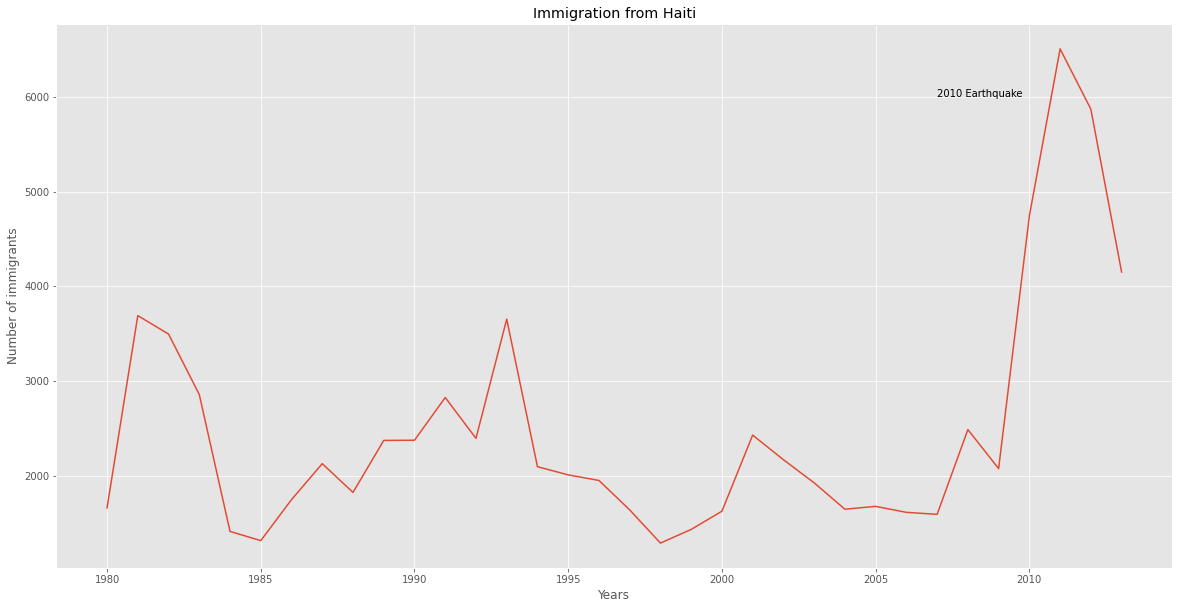

In [11]:
ax = haiti.plot(kind='line', figsize=(20,10))
ax.set(title='Immigration from Haiti', ylabel='Number of immigrants', xlabel='Years')
plt.text(2007, 6000, '2010 Earthquake');  # Annotate plot with the 2010 earthquake 

### Seaborn

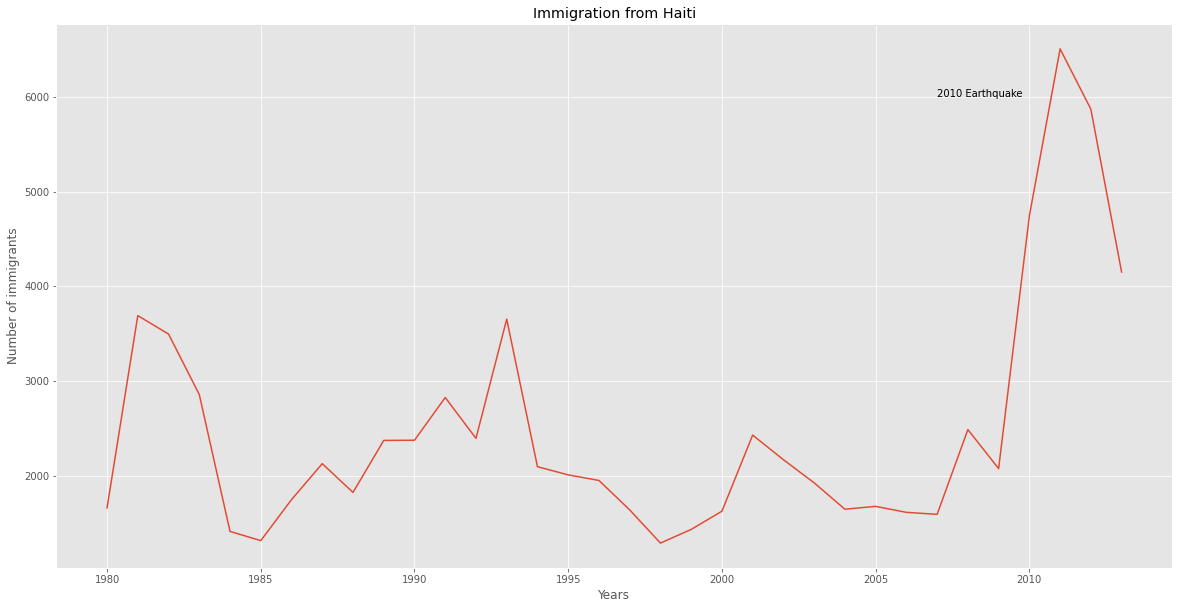

In [12]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=haiti)
ax.set(title='Immigration from Haiti', ylabel='Number of immigrants', xlabel='Years')
plt.text(2007, 6000, '2010 Earthquake');  # Annotate plot with the 2010 earthquake 

### Plotly

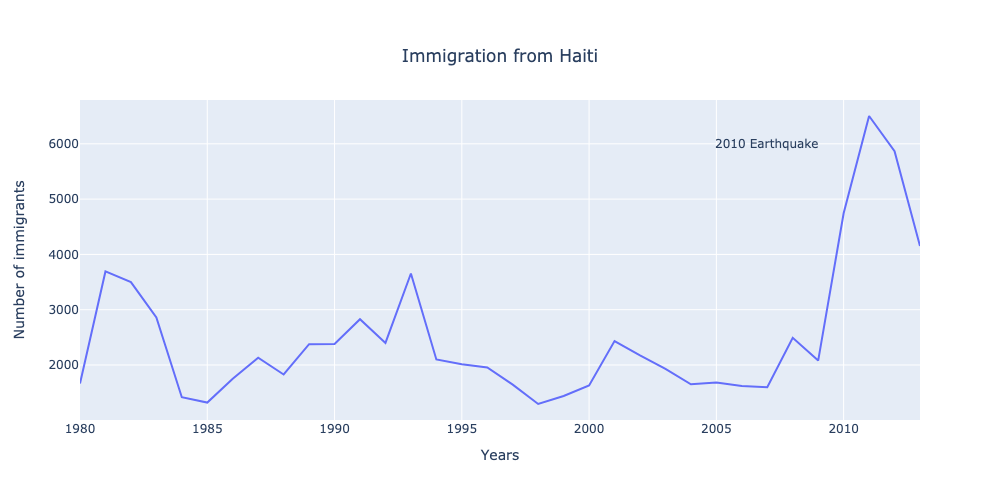

In [13]:
fig = px.line(haiti, title='Immigration from Haiti', width=1000, height=500, labels={"index": "Years", "value": 'Number of immigrants'})
fig = fig.update_layout(showlegend=False, title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})  # Center title
annotation = {'x': 2007, 'y': 6000, 'text': '2010 Earthquake', 'showarrow': False} # Annotate plot with the 2010 earthquake 
fig.add_annotation(annotation)
fig.show()

## Multiple Line Plot

Which countries contributed the most to immigration to Canada?

In [14]:
df_canada.sort_values(by='Total', ascending = False, axis = 0, inplace = True)
df_top5 = df_canada.head(5)
df_top5 = df_top5[years].transpose()
df_top5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
df_top5.index = df_top5.index.map(int)

### Matplotlib

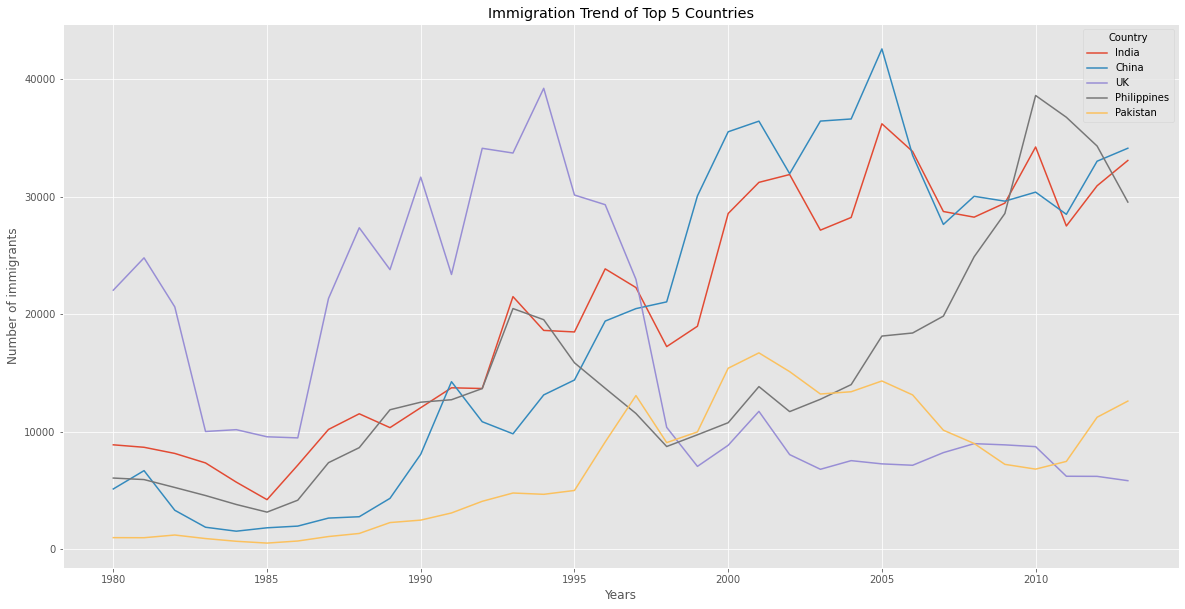

In [15]:
ax = df_top5.plot(kind='line', figsize=(20,10))
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

### Seaborn

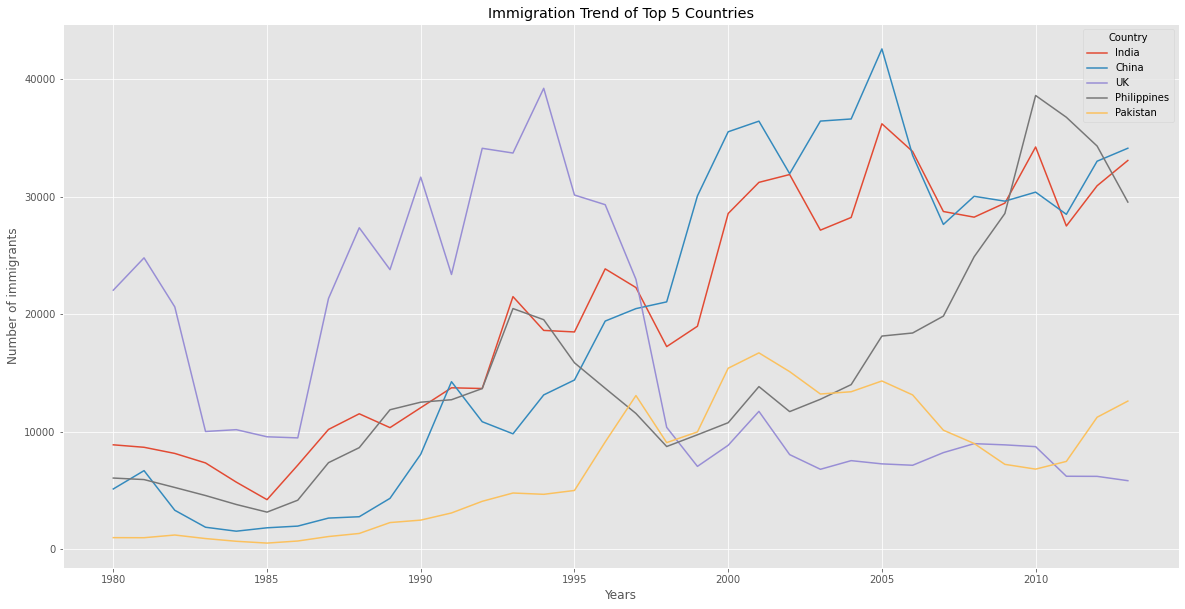

In [16]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_top5, dashes=False)
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

### Plotly

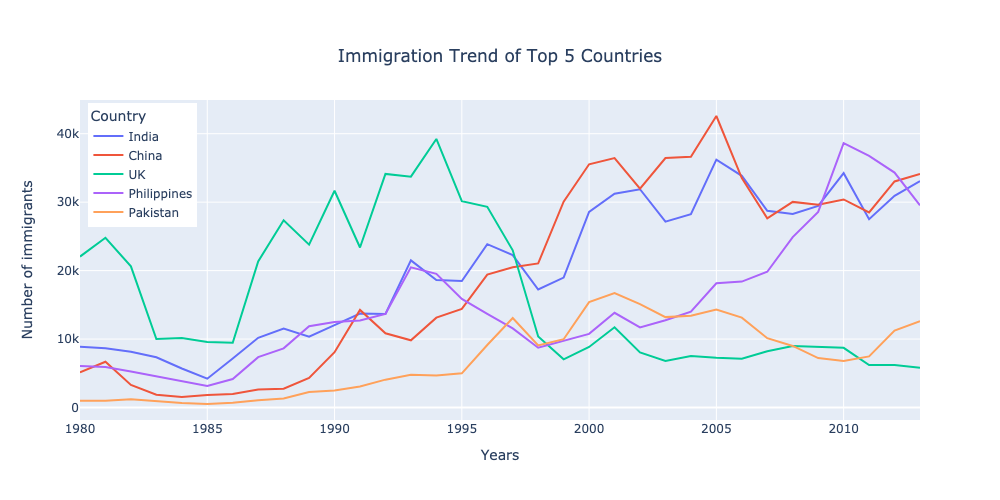

In [17]:
fig = px.line(df_top5, title='Immigration Trend of Top 5 Countries', width=1000, height=500, labels={"index": "Years", "value": 'Number of immigrants'})
# Center title and move legend to the left
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()

## Area Plots

### Matplotlib

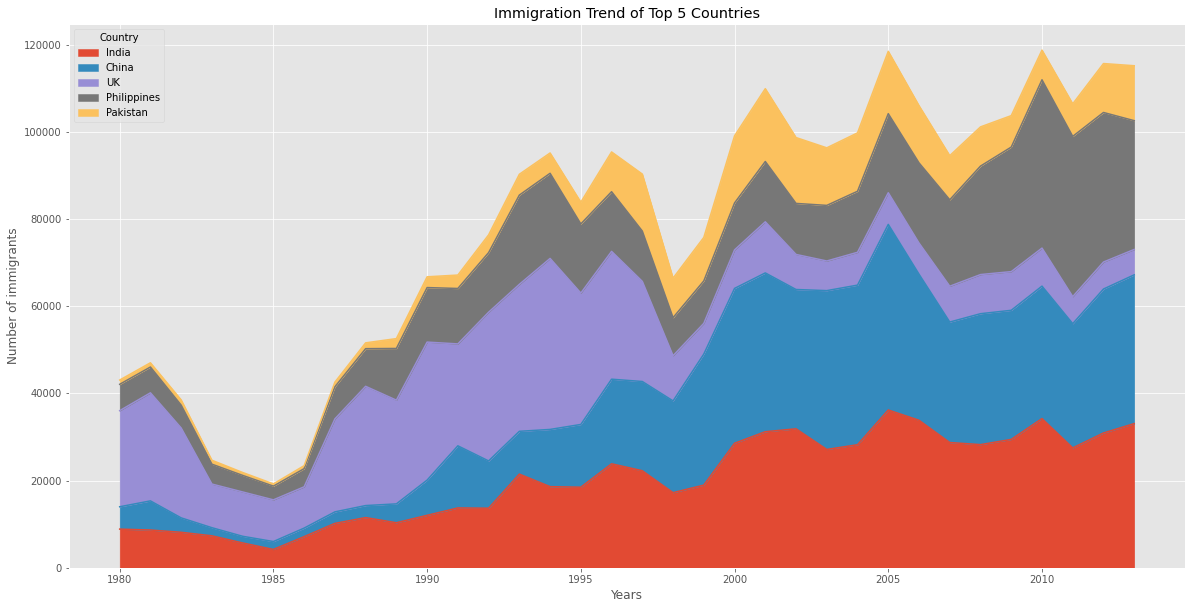

In [18]:
ax = df_top5.plot(kind = 'area', figsize=(20,10))
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

### Seaborn

NA

### Plotly

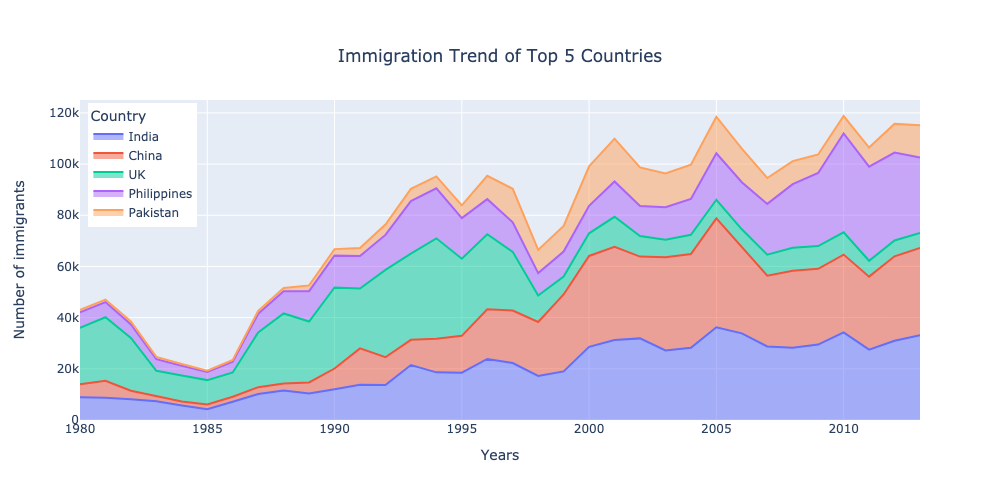

In [19]:
fig = px.area(df_top5, title='Immigration Trend of Top 5 Countries', width=1000, height=500, labels={"index": "Years", "value": 'Number of immigrants'})
# Center Title and Move Legend to the left
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()

## Single Histogram

What is the number of new immigrants from the various countries to Canada in 2013?

In [20]:
bin_counts, bin_edges = np.histogram(df_canada['2013'])

### Matplotlib

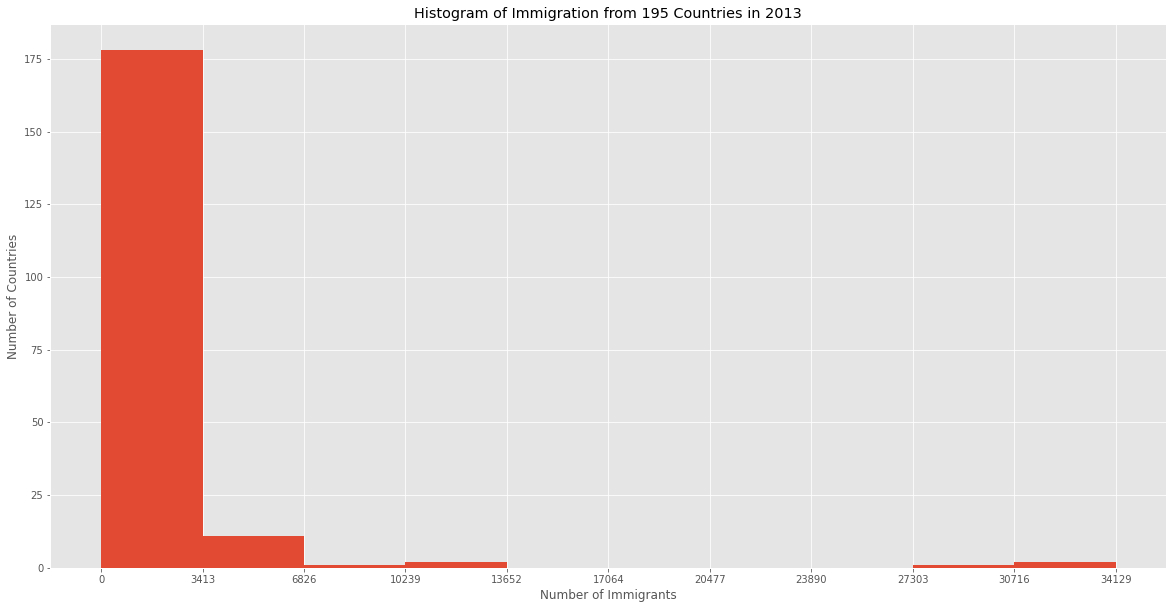

In [21]:
ax = df_canada['2013'].plot(kind='hist', figsize=(20,10), xticks=bin_edges)
ax.set(title='Histogram of Immigration from 195 Countries in 2013', ylabel='Number of Countries', xlabel='Number of Immigrants');

### Seaborn

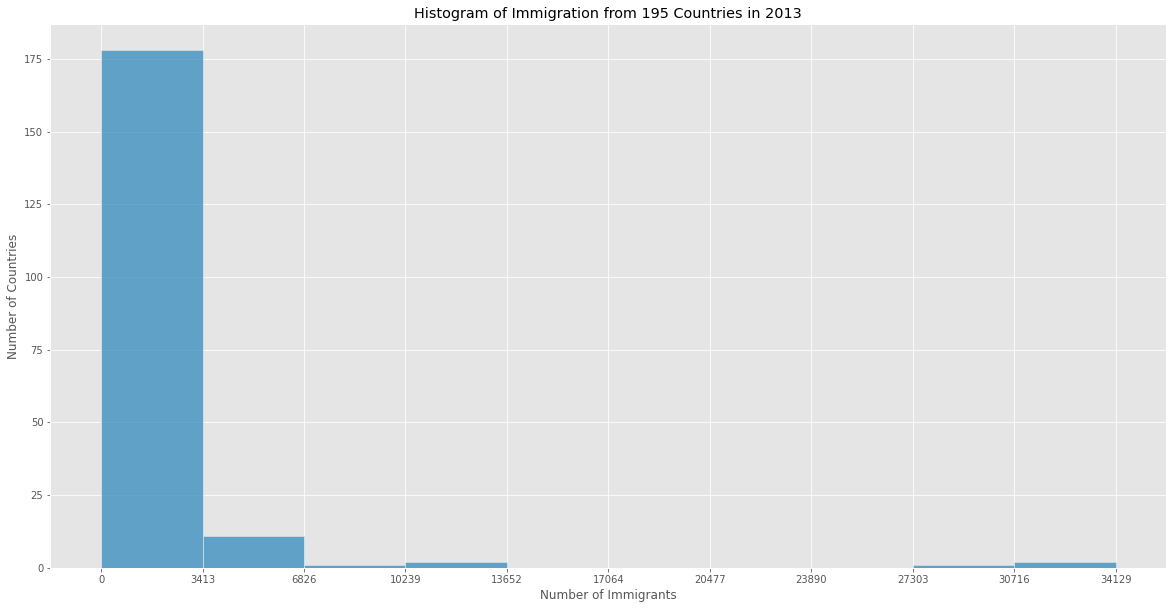

In [22]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data=df_canada['2013'], bins=bin_edges)
plt.xticks(bin_edges)
ax.set(title='Histogram of Immigration from 195 Countries in 2013', ylabel='Number of Countries', xlabel='Number of Immigrants');

### Plotly

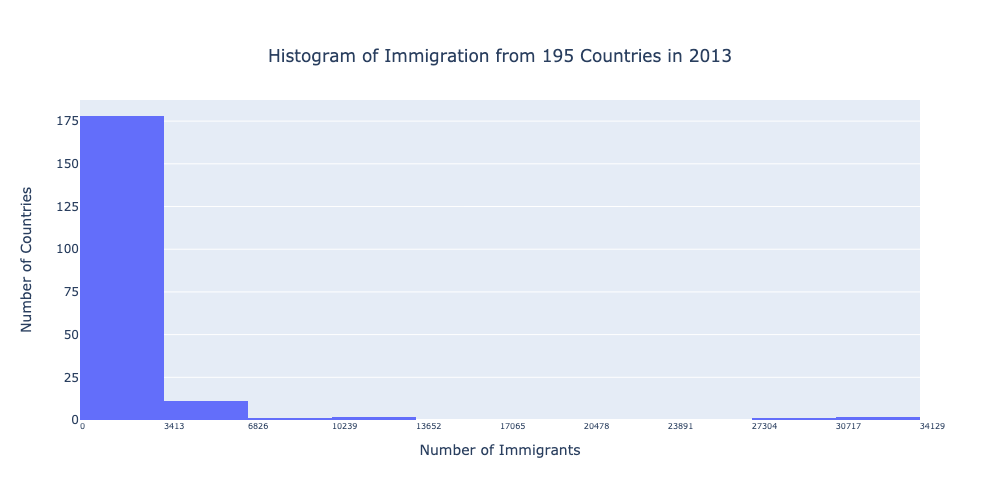

In [23]:
fig = go.Figure(go.Histogram(x=df_canada['2013'], xbins=dict(start=0, end=bin_edges[-1]+1, size=bin_edges[1]+1)))
fig.update_layout(title_text='Histogram of Immigration from 195 Countries in 2013', xaxis_title_text='Number of Immigrants',
    yaxis_title_text='Number of Countries', title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},width=1000, height=500)
fig.update_xaxes(tickangle=0, tickmode = 'array', tickvals = bin_edges, ticktext= [math.ceil(tick) for tick in bin_edges], ticklabelposition="outside right",tickfont_size=8)
fig.update_yaxes(tickvals=np.arange(0,200,25))
fig.show()

## Multiple Histograms

 What is the immigration distribution for Denmark, Norway, and Sweden from 1980 to 2013?

In [24]:
df_t = df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
bin_counts, bin_edges = np.histogram(df_t, 15)

### Matplotlib

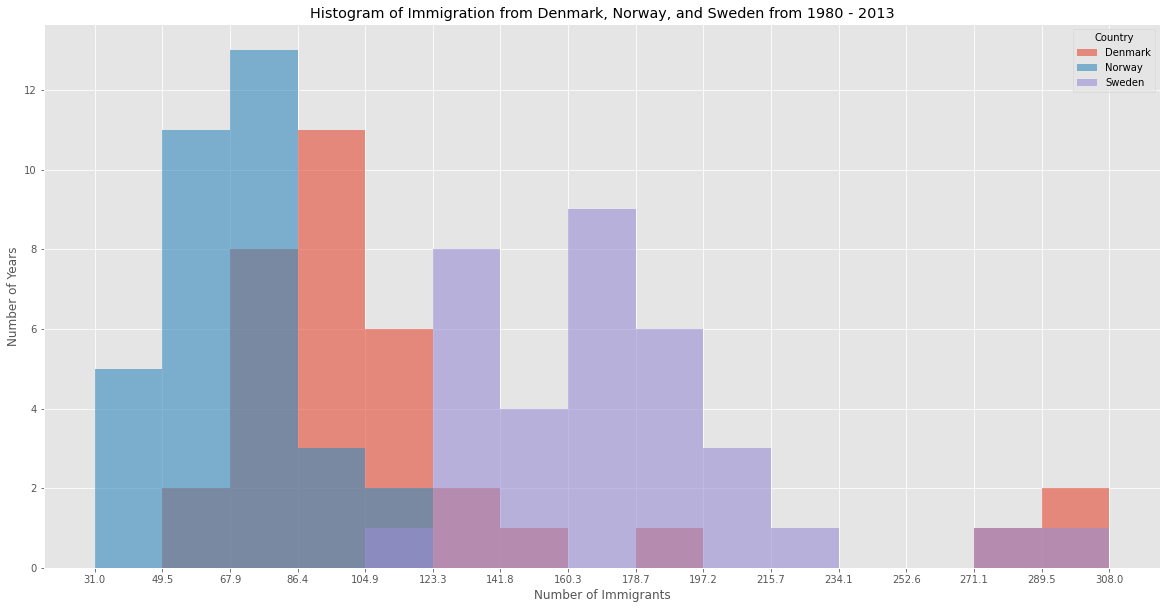

In [25]:
ax = df_t.plot(kind='hist', figsize=(20,10),bins=15, xticks=bin_edges, alpha=0.6)
ax.set(title='Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013', ylabel='Number of Years', xlabel='Number of Immigrants');

### Seaborn

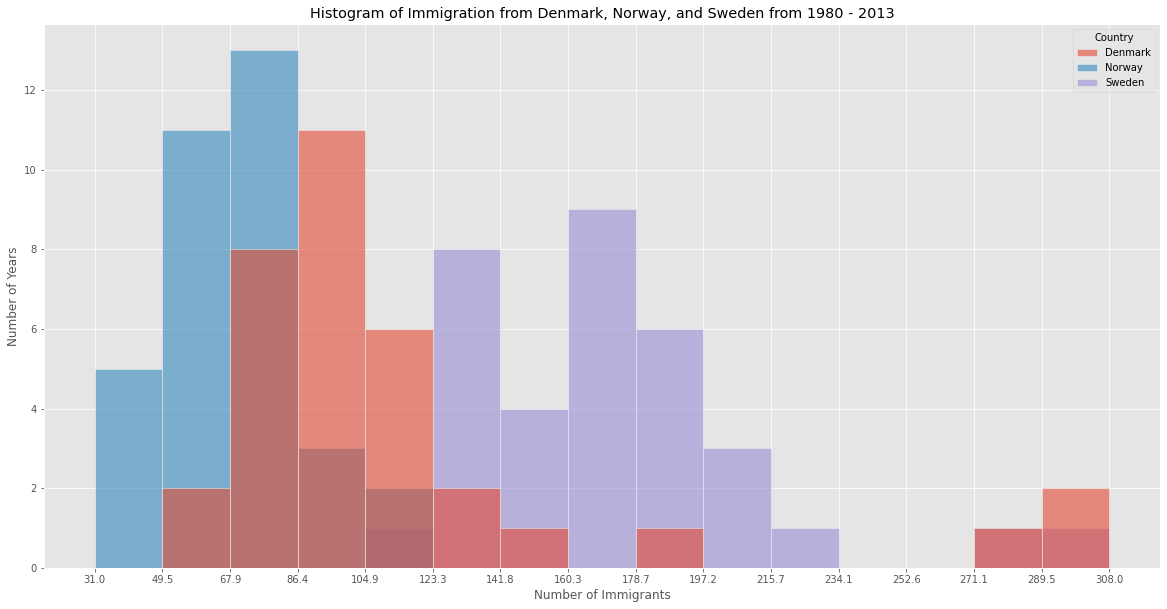

In [26]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data=df_t, bins=bin_edges, alpha=0.6)
plt.xticks(bin_edges)
ax.set(title='Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013', ylabel='Number of Years', xlabel='Number of Immigrants');

### Plotly

In [ ]:
fig = go.Figure(go.Histogram(
    x=df_t['Denmark'],
    xbins=dict( # bins used for histogram
        start=31,
        end=330,
        size=18.5
    ),
    opacity=0.75
))

fig.add_trace(go.Histogram(
    x=df_t['Norway'],
        xbins=dict( # bins used for histogram
        start=31,
        end=330,
        size=18.5
    ),opacity=0.75))

fig.add_trace(go.Histogram(
    x=df_t['Sweden'],
        xbins=dict( # bins used for histogram
        start=31,
        end=330,
        size=18.5
    ), opacity=0.75),
)


fig.update_layout(
    barmode="overlay",
    bargap=0,
)

fig.update_xaxes(
                 tickmode = 'array',
                 tickvals =bin_edges ,
                 ticktext= bin_edges,
                 ticklabelposition="outside right",
                 tickfont_size=12
                )


fig.show()

## Bar Charts

In [ ]:
df_iceland = df_canada.loc['Iceland', years]

### Matplotlib

In [ ]:
df_iceland.plot(kind='bar', figsize=(20, 10))
ax.set(title='Icelandic immigrants to Canada from 1980 to 2013', ylabel='Number of immigrants', xlabel='Year');

In [ ]:
df_canada.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_canada['Total'].tail(15)

 # generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show() 

### Seaborn

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(df_iceland.index, df_iceland.values);
ax.set(title='Icelandic immigrants to Canada from 1980 to 2013', ylabel='Number of immigrants', xlabel='Year');
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(20,10))
df_canada.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_canada['Total'].tail(15)
df_top15.sort_values(ascending=False, inplace=True)

 # generate plot
sns.barplot(y=df_top15.index, x=df_top15.values, orient='h')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()    

### Plotly

In [ ]:
iceland = pd.DataFrame({'Year': df_iceland.index, 'Number fo immigrants': df_iceland.values})
fig = px.bar(iceland, x='Year', y='Number fo immigrants')
fig.show()

In [ ]:
df_top15.sort_values(ascending=False, inplace=True)
fig = px.bar(df_top15, y=df_top15.index, x=df_top15.values, text = df_top15.values, orientation='h', category_orders={'Country': df_top15.index})
fig.show()

## Pie Charts

In [ ]:
df_continents = df_canada.groupby('Continent', axis=0).sum()

### Matplotlib

In [ ]:
# Change background color
fig = plt.figure()
fig.patch.set_facecolor('white')

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df_continents['Total'].plot(kind='pie', 
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list)
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

### Seaborn

NA

### Plotly

In [ ]:
fig = px.pie(df_continents['Total'], values=df_continents['Total'].values, names=df_continents['Total'].index, title='Population of European continent')
fig.update_traces(marker=dict(colors=colors_list), rotation=135, pull=[0.1, 0, 0, 0, 0.1, 0.1])
fig.show()

## Box Plots

In [ ]:
df_CI = df_canada.loc[['China','India'], years].transpose()

### Matplotlib

In [ ]:
df_CI.plot(kind='box', figsize=(20, 10))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants');

### Seaborn

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_CI)
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants');

### Plotly

In [ ]:
fig = px.box(df_CI)
fig.show()

## Scatter Plots

In [ ]:
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']

### Matplotlib

In [ ]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(20, 10), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants');

### Seaborn

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_total, x='year', y='total')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants');

### Plotly

In [ ]:
fig = px.scatter(df_total, x='year', y='total')
fig.show()